In [65]:
#STOKE_PREDICTION_MODEL By HEMLATA

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import confusion_matrix

In [4]:
df = pd.read_csv(r"C:\Users\shank\OneDrive\Documents\Stroke_Prediction\healthcare-dataset-stroke-data.csv")


## EDA

In [5]:
df.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3797,41962,Female,32.0,0,0,Yes,Private,Rural,108.80,24.0,Unknown,0
3066,13270,Female,40.0,0,0,No,Govt_job,Urban,90.21,41.2,never smoked,0
4992,64652,Female,44.0,0,0,Yes,Private,Rural,56.85,24.4,never smoked,0
2359,34336,Male,50.0,1,0,Yes,Govt_job,Rural,79.73,25.5,smokes,0
1041,57622,Female,30.0,0,0,Yes,Govt_job,Rural,110.55,30.9,smokes,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.shape

(5110, 12)

In [8]:
df.drop("id",axis=1,inplace=True)

In [9]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Handling Missing Values

In [13]:
df.bmi.fillna(df.bmi.mean(),inplace=True)

In [14]:
df.sample(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2631,Male,49.0,0,0,Yes,Private,Urban,87.06,28.3,never smoked,0
3838,Male,56.0,0,0,Yes,Self-employed,Urban,122.73,37.5,formerly smoked,0
2485,Female,14.0,0,0,No,Private,Rural,70.54,24.4,formerly smoked,0
1331,Female,35.0,0,0,Yes,Self-employed,Urban,70.87,22.1,formerly smoked,0
2496,Female,54.0,0,0,Yes,Private,Rural,97.47,26.7,never smoked,0


In [15]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<Figure size 2000x1500 with 0 Axes>

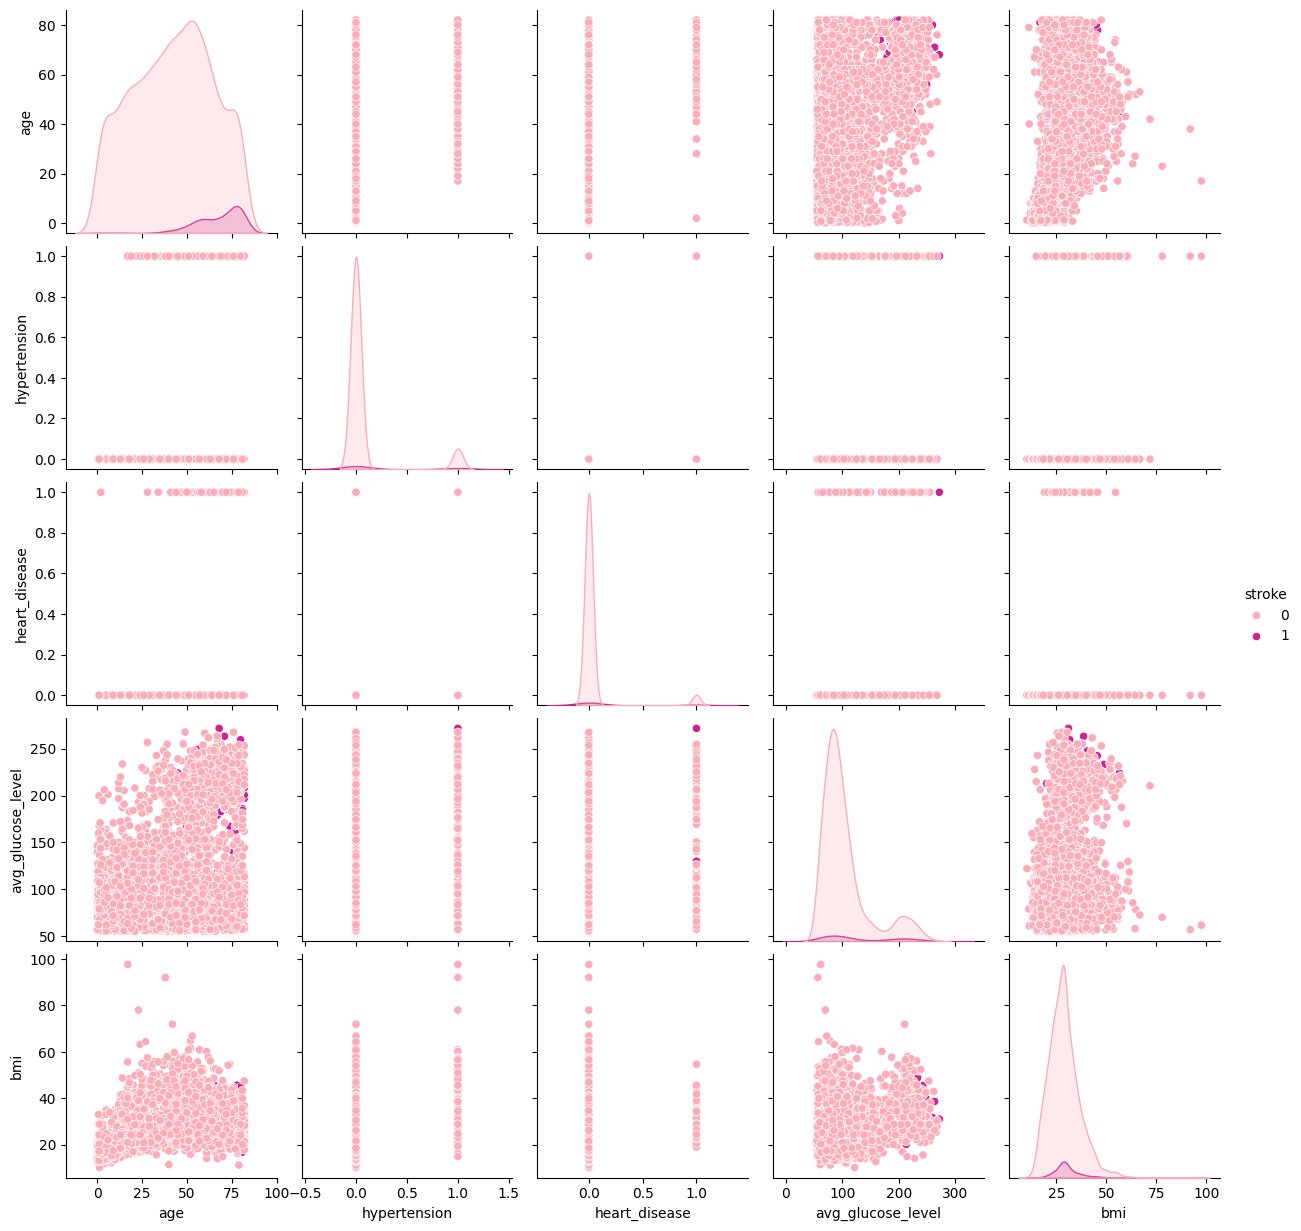

In [16]:
fig=plt.figure(figsize=(20,15),dpi=100)
sns.pairplot(df,hue="stroke",palette='RdPu');

In [17]:
dfnumerical=df[['age','avg_glucose_level','bmi']]
dfcategorical=df[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                       'smoking_status', 'stroke']]

Text(0.5, 1.0, 'kde for age, avg_glucose_level and bmi')

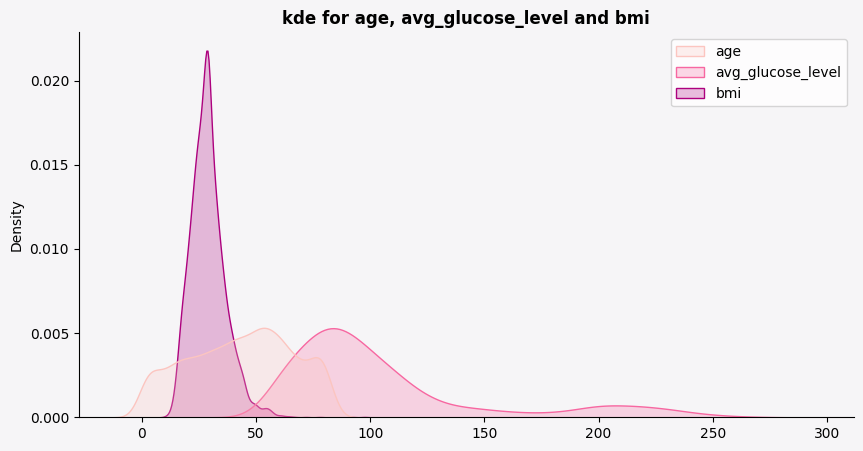

In [18]:
fig,ax=plt.subplots(figsize=(10,5))
fig.patch.set_facecolor('#f6f5f7')
ax.set_facecolor('#f6f5f7')
for i in ["top","right"]:
    ax.spines[i].set_visible(False)

sns.kdeplot(data=dfnumerical,shade=True,palette='RdPu')
plt.title("kde for age, avg_glucose_level and bmi",weight='bold')

In [19]:
df.gender.value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

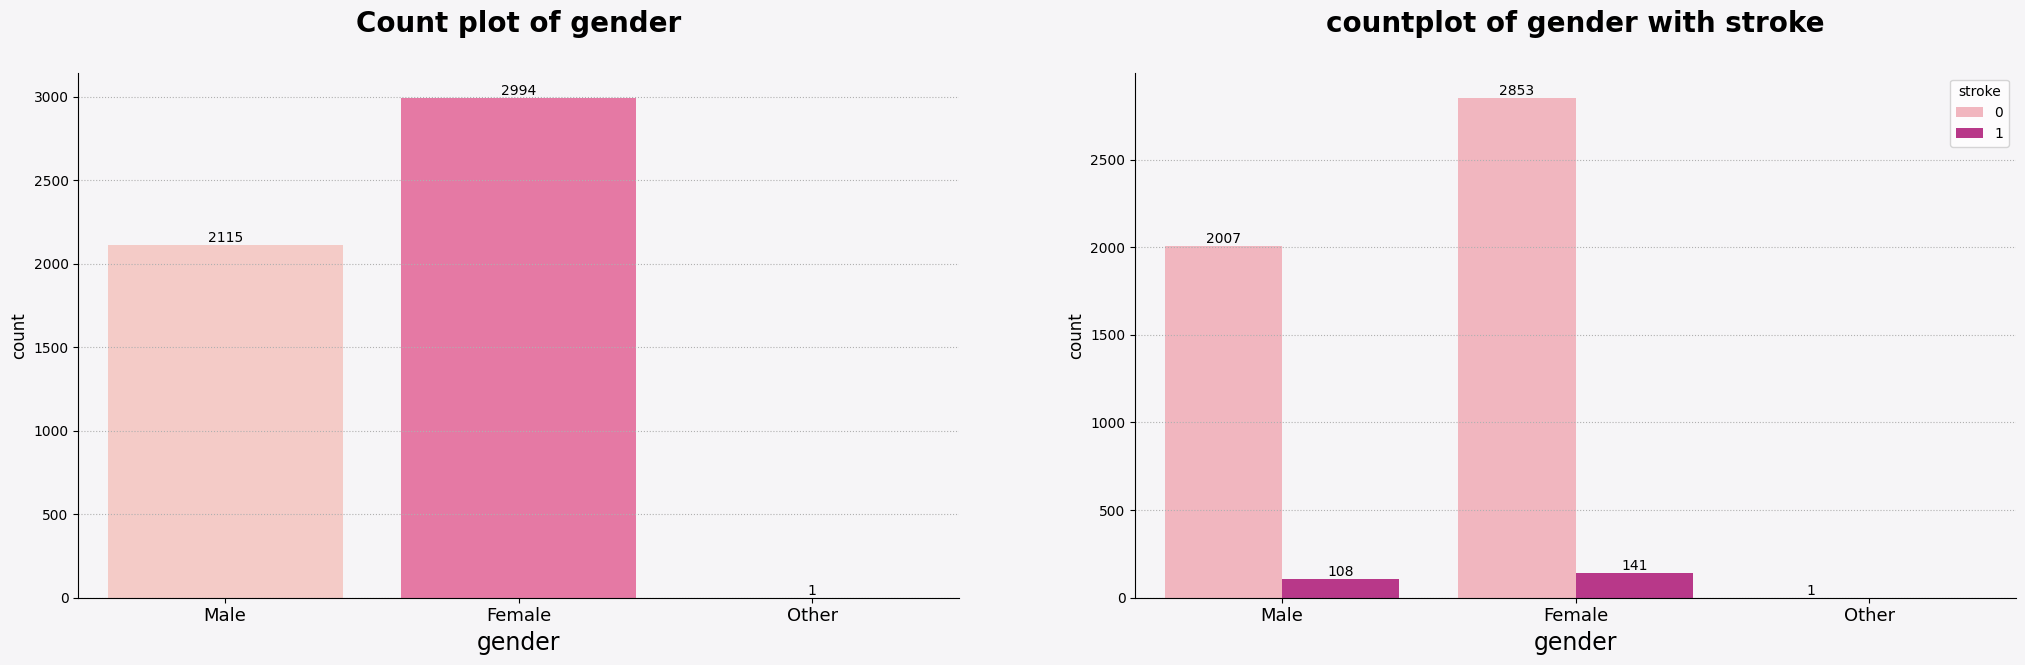

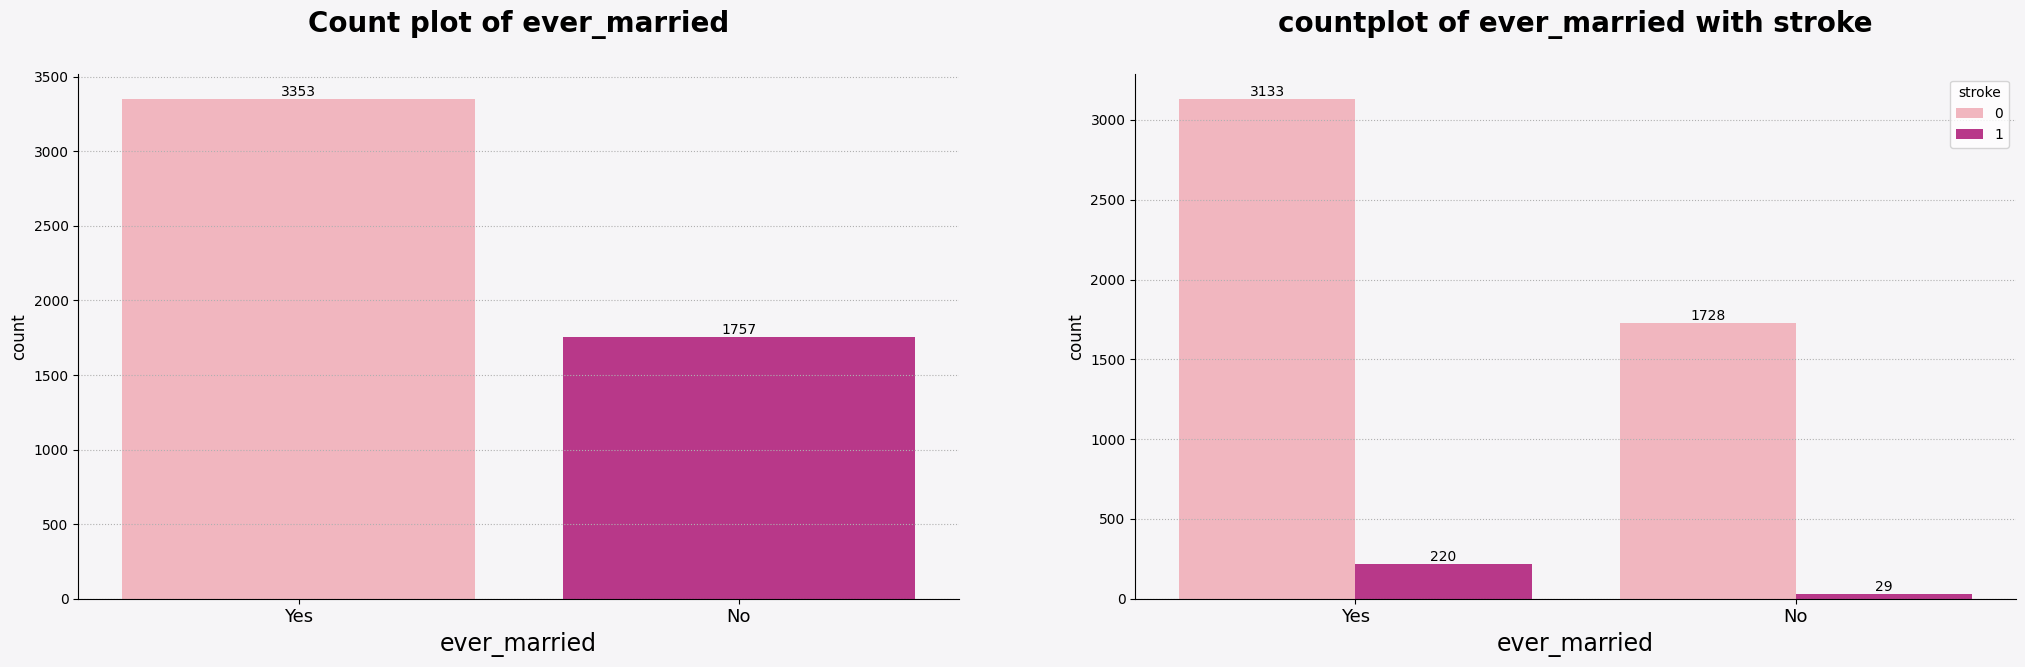

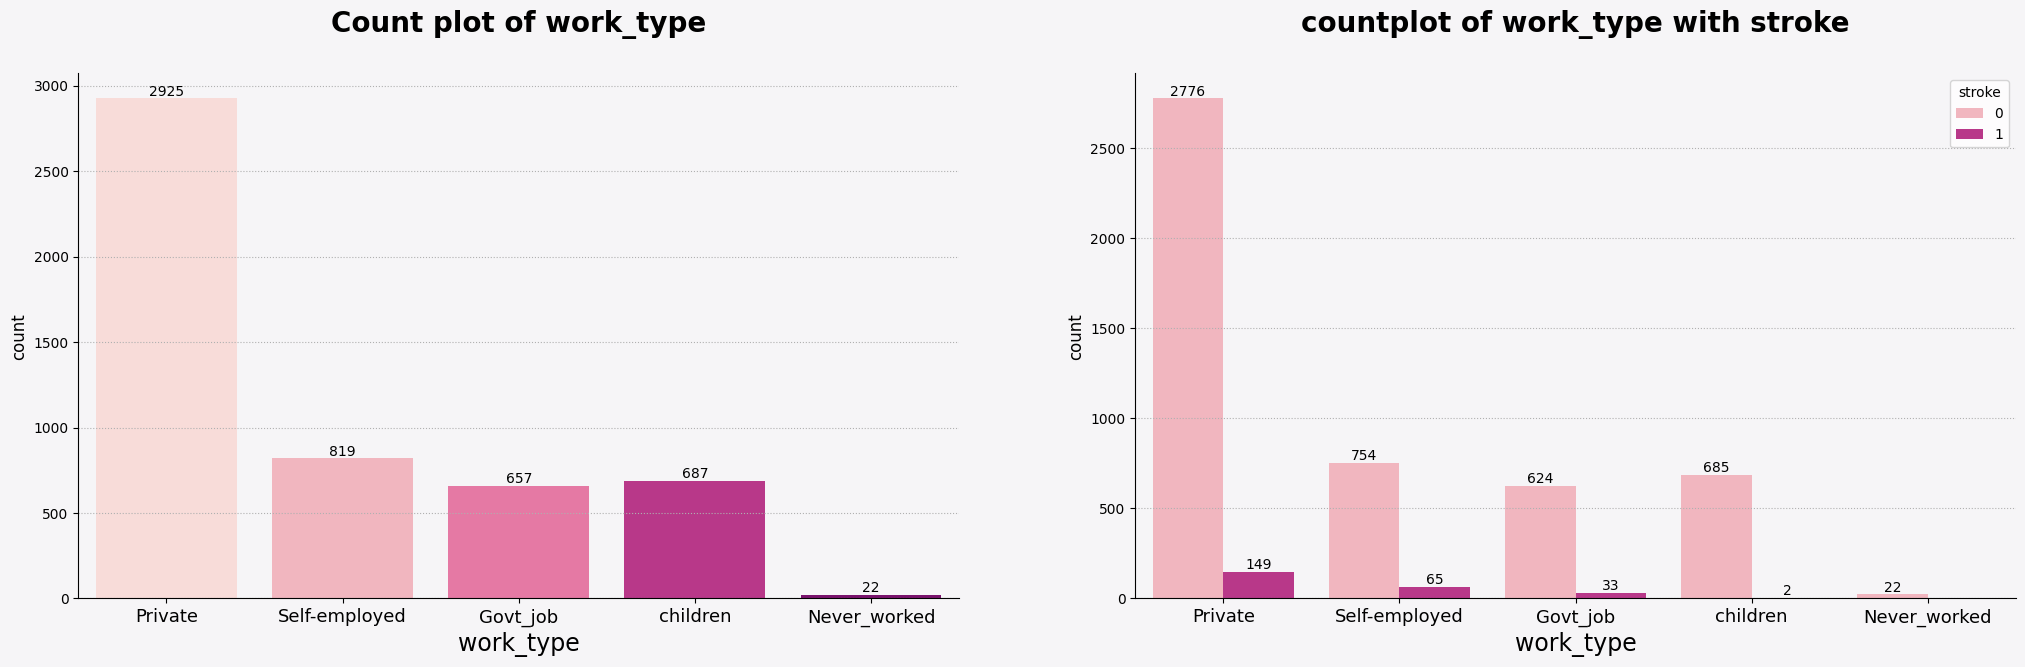

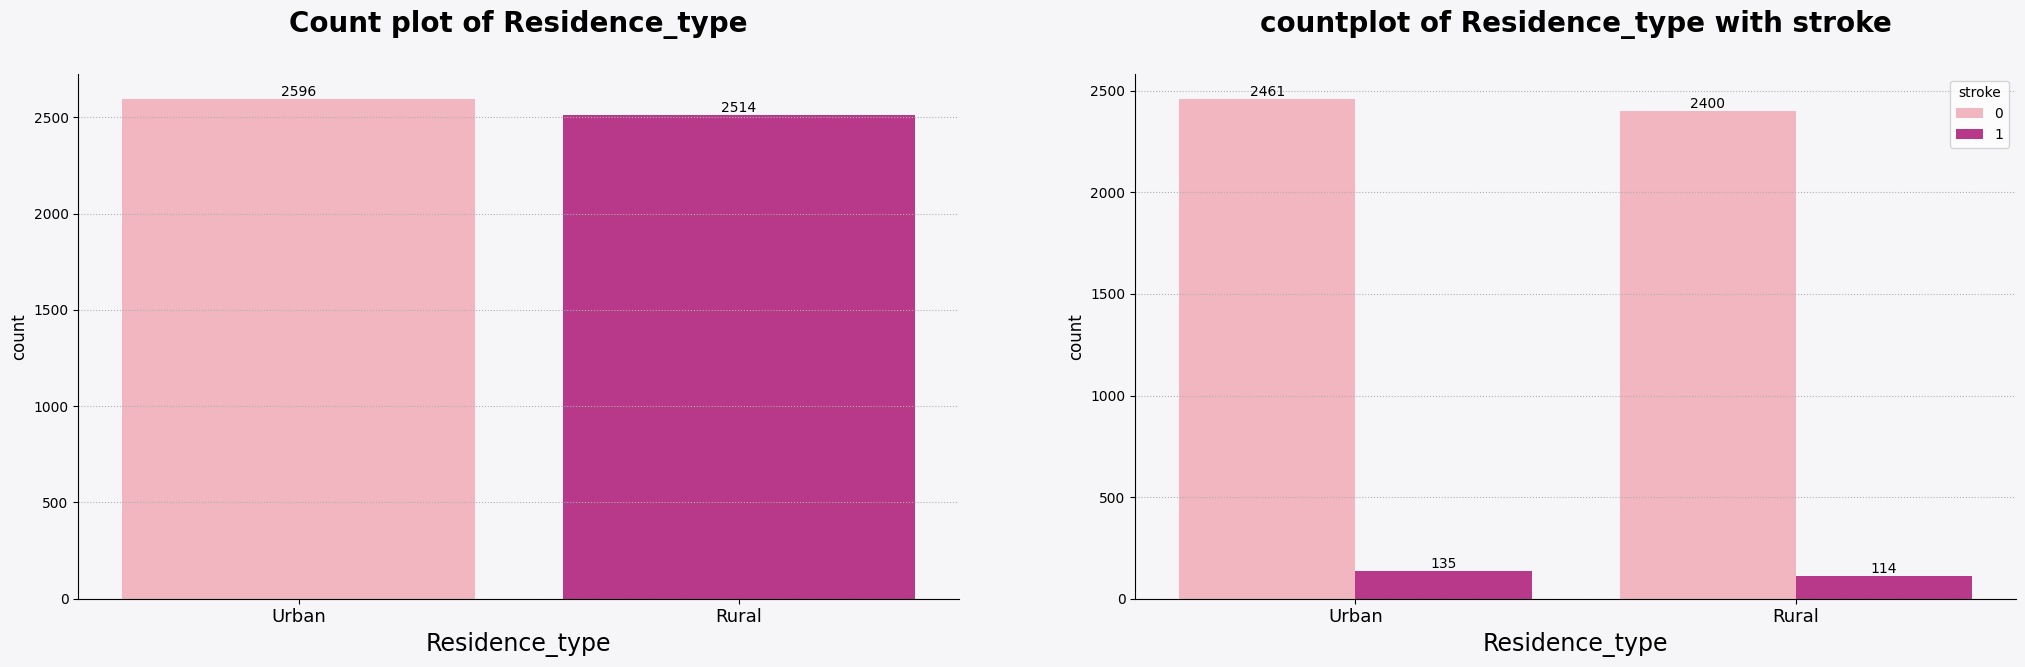

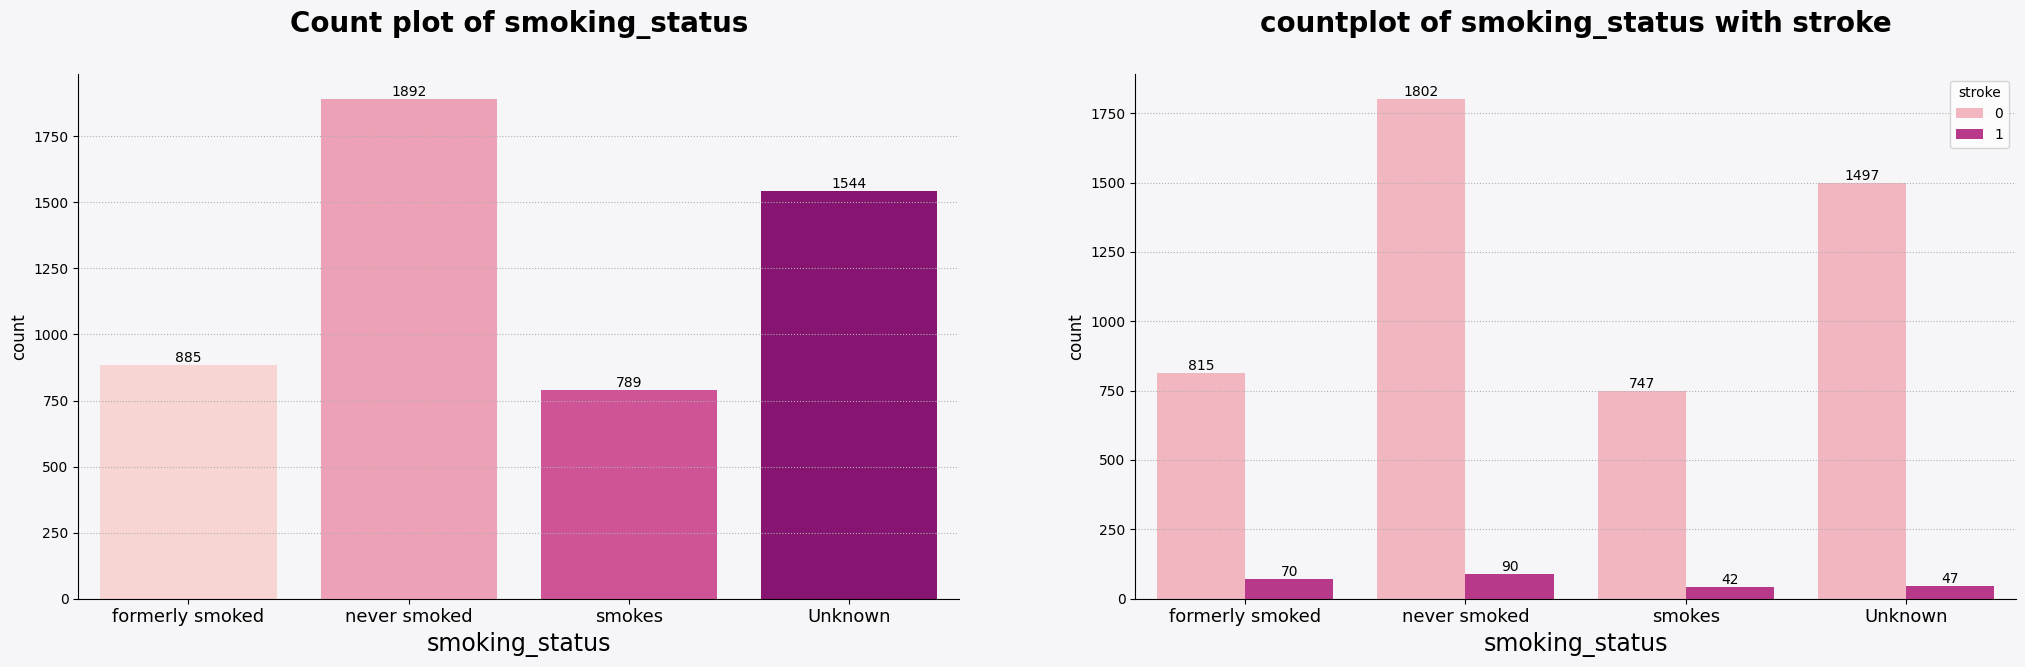

In [20]:
for i in df.columns:
    if df[i].dtype == "object":
        
        fig=plt.figure(figsize=(25,15))
        fig.patch.set_facecolor("#f6f5f7")
        
        xx=plt.subplot(2,2,1)
        xx.set_facecolor("#f6f5f7")
        x=sns.countplot(data=df, x=i,palette='RdPu')
        for container in x.containers:
            x.bar_label(container)
        plt.xticks(fontsize=13)
        plt.xlabel(i,fontsize=17)
        plt.ylabel("count",fontsize=12)
        plt.title(f"Count plot of {i}\n",fontsize=20,weight="bold")
        for x in ["top","right"]:
            xx.spines[x].set_visible(False)
        xx.grid(linestyle=':',axis='y')
        
    
    
        
        vv=plt.subplot(2,2,2)
        vv.set_facecolor("#f6f5f7")
        v=sns.countplot(data=df,x=i,hue="stroke",palette='RdPu')
        for container in v.containers:
            v.bar_label(container)
        plt.xticks(fontsize=13)
        plt.xlabel(i,fontsize=17)
        plt.ylabel("count",fontsize=12)
        plt.title(f"countplot of {i} with stroke\n",fontsize=20,weight="bold" )
        for v in ["top","right"]:
            vv.spines[v].set_visible(False)
        vv.grid(linestyle=':',axis='y')
        plt.show()

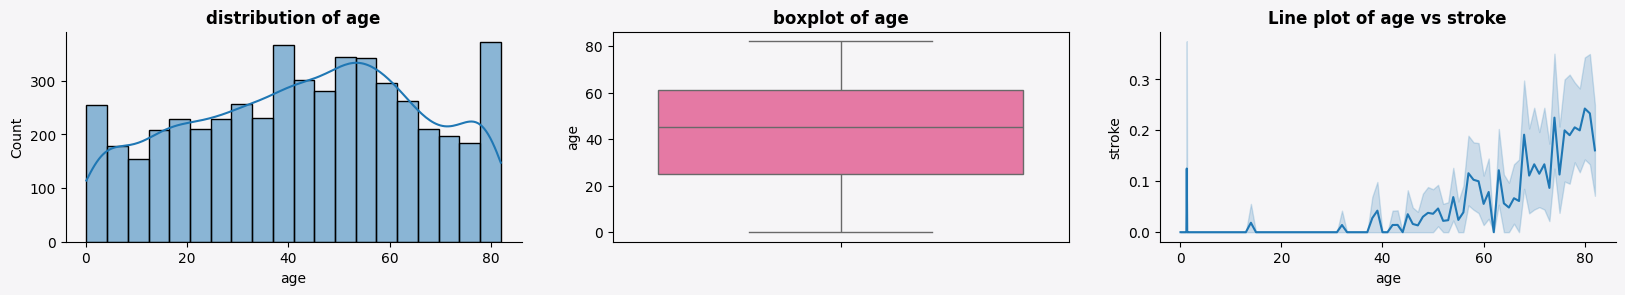

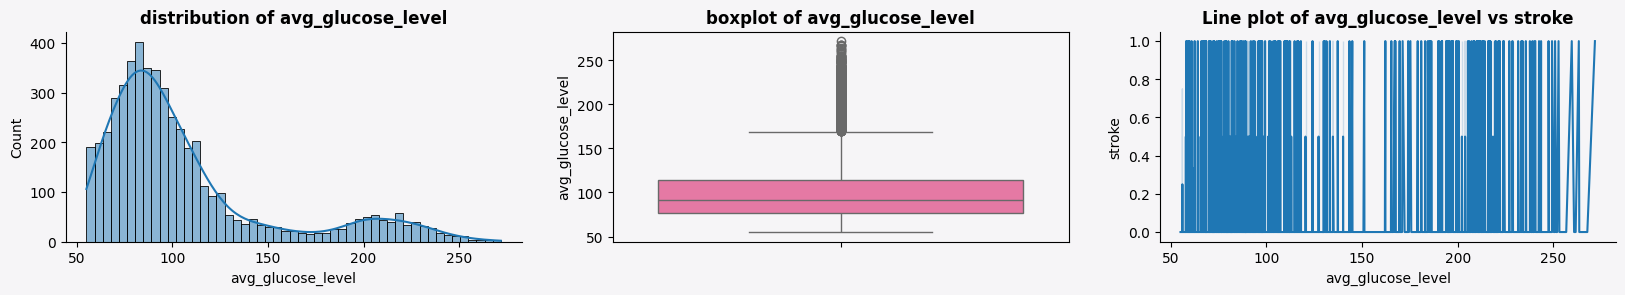

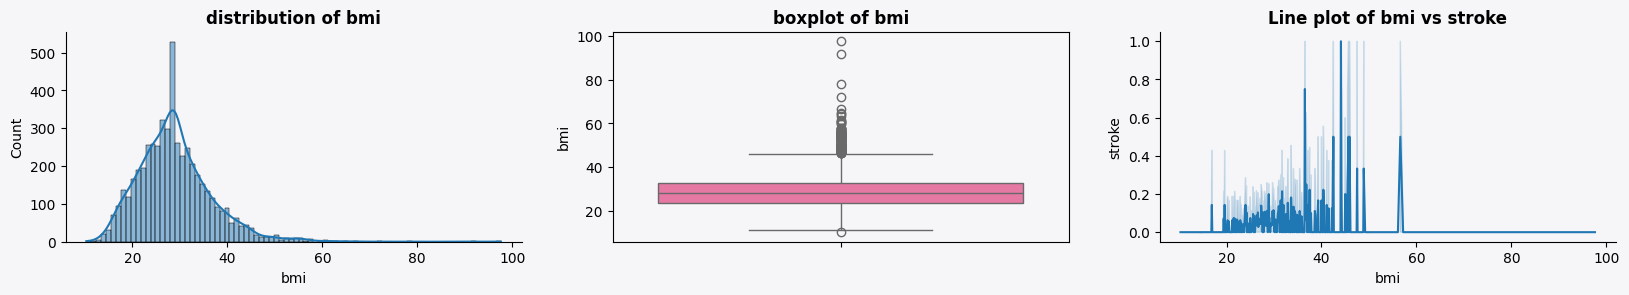

In [21]:
for i in dfnumerical:
    fig=plt.figure(figsize=(20,6))
    fig.patch.set_facecolor("#f6f5f7")
        
    v=plt.subplot(2,3,1)
    v.set_facecolor('#f6f5f7')
    vv=sns.histplot(data=dfnumerical,x=i,kde=True,palette='RdPu')
    plt.title(f"distribution of {i}",weight='bold')
    for vv in ["top","right"]:
        v.spines[vv].set_visible(False)
        
        
    b=plt.subplot(2,3,2) 
    b.set_facecolor("#f6f5f7")
    sns.boxplot(dfnumerical[i],palette='RdPu')
    plt.ylabel(i)
    plt.title(f"boxplot of {i}",weight='bold')
        
    l=plt.subplot(2,3,3)
    l.set_facecolor("#f6f5f7")
    ll=sns.lineplot(data=df, x=i, y="stroke",palette='RdPu')
    for ll in ["top","right"]:
        l.spines[ll].set_visible(False)
    plt.title(f"Line plot of {i} vs stroke",weight='bold')

In [22]:
pd.crosstab(df.gender,df.work_type)

work_type,Govt_job,Never_worked,Private,Self-employed,children
gender,,,,,
Female,399,11,1754,504,326
Male,258,11,1170,315,361
Other,0,0,1,0,0


In [23]:
pd.crosstab(df.gender,df.ever_married)

ever_married,No,Yes
gender,,
Female,993,2001
Male,763,1352
Other,1,0


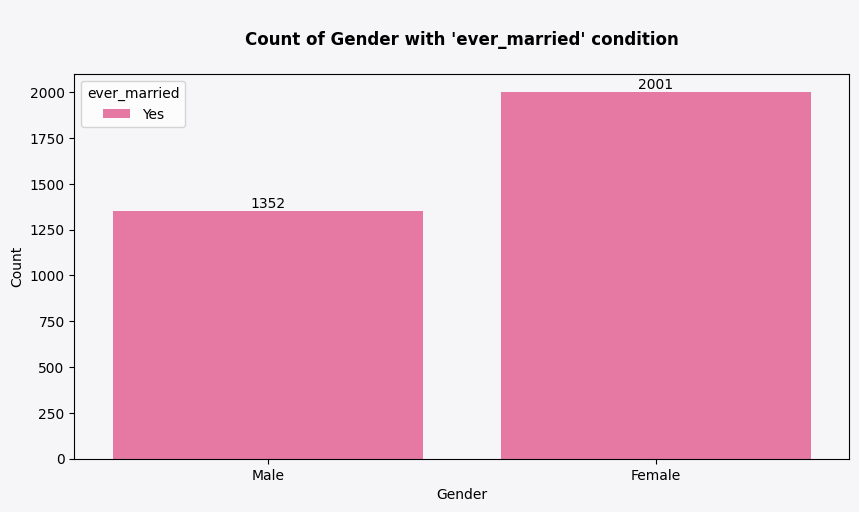

In [24]:
fig,x=plt.subplots(figsize=(10,5))
fig.patch.set_facecolor('#f6f5f7')
x.set_facecolor('#f6f5f7')
j = df[df['ever_married'] == "Yes"]
x=sns.countplot(data=j, x="gender", palette='RdPu', hue='ever_married')
for i in x.containers:
    x.bar_label(i)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("\nCount of Gender with 'ever_married' condition\n",weight="bold")
plt.show()


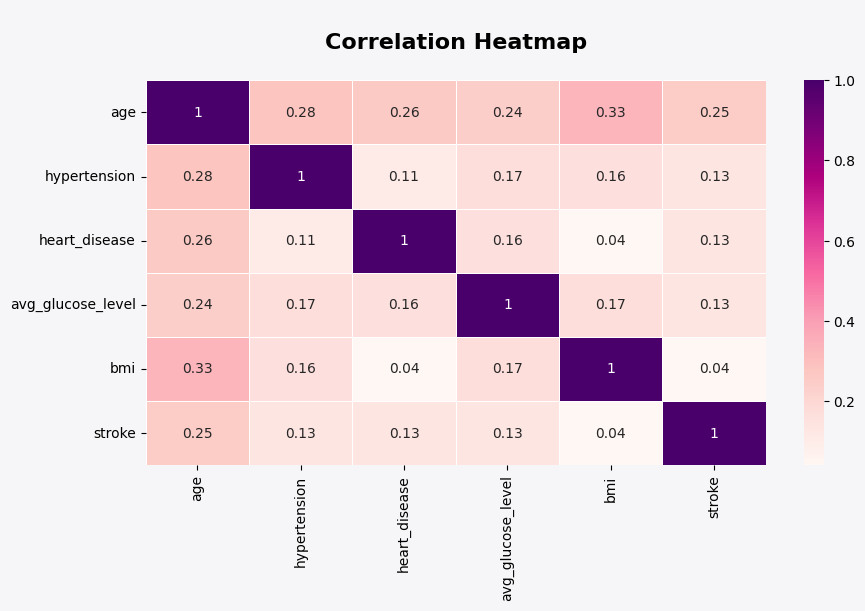

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Correlation heatmap
fig, ax = plt.subplots(figsize=(10, 5))
fig.patch.set_facecolor('#f6f5f7')

v = round(numeric_df.corr(), 2)
sns.heatmap(v, annot=True, cmap="RdPu", linewidths=.5, ax=ax)

plt.title("\nCorrelation Heatmap\n", fontsize=16, weight="bold")
plt.show()


##  Data Preprocessing

### Define features x & target y

In [43]:
x=df.drop("stroke",axis=1)
y=df.stroke

In [44]:
x.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked
5109,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.200000,Unknown


In [45]:
y.tail()

5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, dtype: int64

## encode the string columns

In [46]:
l=LabelEncoder()
x=x.apply(LabelEncoder().fit_transform)

In [47]:
x.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5105,0,101,1,0,1,2,1,1360,162,2
5106,0,102,0,0,1,3,1,3030,274,2
5107,0,56,0,0,1,3,0,1314,180,2
5108,1,72,0,0,1,2,0,3363,129,1
5109,0,65,0,0,1,0,1,1454,135,0


## Data scaling

In [48]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [49]:
x

array([[ 1.18807255,  1.03951283, -0.32860186, ...,  1.78017003,
         1.0601011 , -0.35178071],
       [-0.840344  ,  0.7795668 , -0.32860186, ...,  1.54302885,
         0.00597702,  0.58155233],
       [ 1.18807255,  1.60272924, -0.32860186, ...,  0.54287232,
         0.50601024,  0.58155233],
       ...,
       [-0.840344  , -0.34686602, -0.32860186, ..., -0.51521182,
         0.24923642,  0.58155233],
       [ 1.18807255,  0.34632341, -0.32860186, ...,  1.33937707,
        -0.43999855, -0.35178071],
       [-0.840344  ,  0.04305303, -0.32860186, ..., -0.38849515,
        -0.35891208, -1.28511375]], shape=(5110, 10))

## Split Data into train and test

In [50]:
x_tr,x_tst,y_tr,y_tst=train_test_split(x,y,shuffle=True,test_size=0.1,random_state=42)

In [51]:
x_tr.shape

(4599, 10)

In [52]:
x_tst.shape

(511, 10)

## Machine Learning Algorithms

### LogisticRegression

Training Accuracy: 0.9519460752337464
Testing Accuracy: 0.9452054794520548


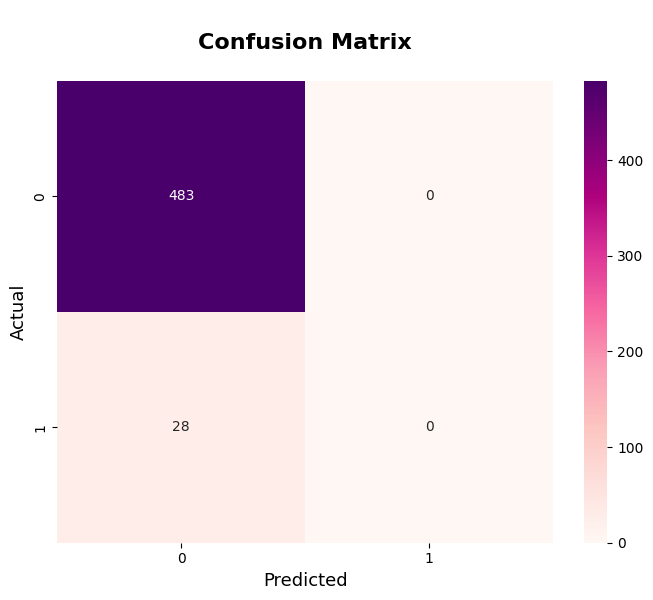

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Train Logistic Regression
model = LogisticRegression(penalty="l2", max_iter=100, C=3, random_state=42)
model.fit(x_tr, y_tr)

# Scores
print("Training Accuracy:", model.score(x_tr, y_tr))
print("Testing Accuracy:", model.score(x_tst, y_tst))

# Predictions
p = model.predict(x_tst)

# Confusion Matrix
plt.figure(figsize=(8,6))
c = confusion_matrix(y_tst, p)
sns.heatmap(c, annot=True, fmt='d', cmap="RdPu")

plt.title("\nConfusion Matrix\n", fontsize=16, weight="bold")
plt.xlabel("Predicted", fontsize=13)
plt.ylabel("Actual", fontsize=13)
plt.show()


### RandomForestClassifier

Training Accuracy: 1.0
Testing Accuracy: 0.9452054794520548


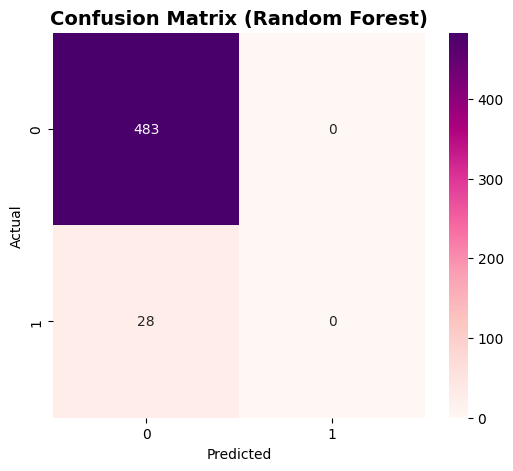

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train Random Forest
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(x_tr, y_tr)

print("Training Accuracy:", model2.score(x_tr, y_tr))
print("Testing Accuracy:", model2.score(x_tst, y_tst))

# Predictions + Confusion Matrix
p2 = model2.predict(x_tst)
c2 = confusion_matrix(y_tst, p2)

plt.figure(figsize=(6,5))
sns.heatmap(c2, annot=True, fmt='d', cmap="RdPu")
plt.title("Confusion Matrix (Random Forest)", fontsize=14, weight="bold")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


SUPPORT VECTOR MACHINE (SVM)

Training Accuracy: 0.9545553381169819
Testing Accuracy: 0.9432485322896281


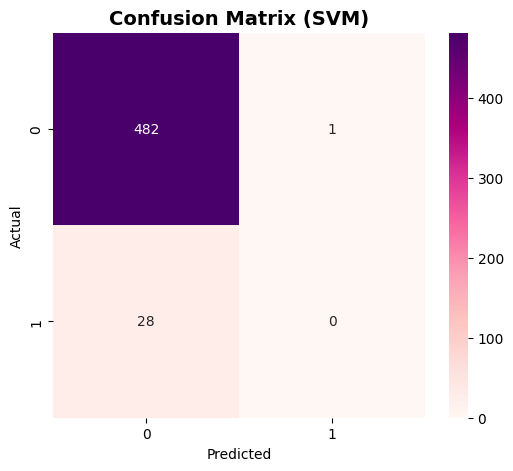

In [63]:
#USING SVM
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train SVM (RBF kernel)
model3 = SVC(C=1000, gamma=0.01, kernel='rbf', random_state=42)
model3.fit(x_tr, y_tr)

print("Training Accuracy:", model3.score(x_tr, y_tr))
print("Testing Accuracy:", model3.score(x_tst, y_tst))

# Predictions + Confusion Matrix
p3 = model3.predict(x_tst)
c3 = confusion_matrix(y_tst, p3)

plt.figure(figsize=(6,5))
sns.heatmap(c3, annot=True, fmt='d', cmap="RdPu")
plt.title("Confusion Matrix (SVM)", fontsize=14, weight="bold")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

MODEL COMPARISON

Logistic Regression - Train: 0.9519460752337464  Test: 0.9452054794520548
Random Forest        - Train: 1.0  Test: 0.9452054794520548
SVM                  - Train: 0.9545553381169819  Test: 0.9432485322896281


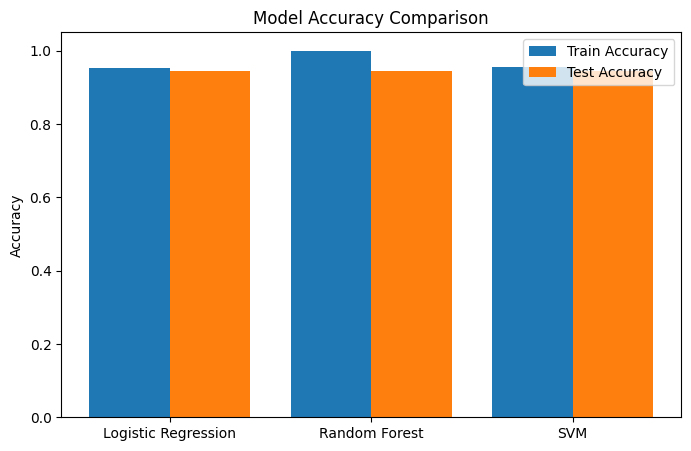

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# ==============================
# Logistic Regression
# ==============================
model1 = LogisticRegression(penalty="l2", max_iter=100, C=3, random_state=42)
model1.fit(x_tr, y_tr)
acc1_train = model1.score(x_tr, y_tr)
acc1_test = model1.score(x_tst, y_tst)

# ==============================
# Random Forest
# ==============================
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(x_tr, y_tr)
acc2_train = model2.score(x_tr, y_tr)
acc2_test = model2.score(x_tst, y_tst)

# ==============================
# Support Vector Machine
# ==============================
model3 = SVC(C=1000, gamma=0.01, kernel='rbf', random_state=42)
model3.fit(x_tr, y_tr)
acc3_train = model3.score(x_tr, y_tr)
acc3_test = model3.score(x_tst, y_tst)

# ==============================
# Print Accuracy Comparison
# ==============================
print("Logistic Regression - Train:", acc1_train, " Test:", acc1_test)
print("Random Forest        - Train:", acc2_train, " Test:", acc2_test)
print("SVM                  - Train:", acc3_train, " Test:", acc3_test)

# ==============================
# Bar Plot Comparison
# ==============================
models = ["Logistic Regression", "Random Forest", "SVM"]
train_acc = [acc1_train, acc2_train, acc3_train]
test_acc = [acc1_test, acc2_test, acc3_test]

x = range(len(models))
plt.figure(figsize=(8,5))
plt.bar(x, train_acc, width=0.4, label="Train Accuracy", align='center')
plt.bar([i+0.4 for i in x], test_acc, width=0.4, label="Test Accuracy", align='center')

plt.xticks([i+0.2 for i in x], models)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.legend()
plt.show()
